In [1]:
## A script for practicing ML to predict pet adoption speed based on various features.
## Script name: predict_adoption_speed_by_features.py
## Date: 02/04/2019
## Author: Wei Guo
## Data source: Gaggle.com PetAdoptionSpeed competition

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
#test  = pd.read_csv("../input/test/test.csv")
print(train.shape)
print(train.columns)

(14993, 24)
Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


In [3]:
# Use pre-prepared sentiment score and magnitude
scomag_train_orig=pd.read_csv("sentiments_train3.csv", encoding='latin1')
scomag_test_orig =pd.read_csv("sentiments_test3.csv", encoding='latin1')
scomag_train=scomag_train_orig[['PetID','scomag']]
scomag_test =scomag_test_orig[['PetID','scomag']]

In [4]:
# If no sentiment score, use 0. 
values={'scomag':0}
train_withSentiment=train.merge(scomag_train,how='left',on='PetID').fillna(value=values)
test_withSentiment =test.merge(scomag_test,  how='left',on='PetID').fillna(value=values)
print(train_withSentiment.shape)
print(test_withSentiment.shape)

(14993, 25)
(3948, 24)


In [5]:
train_withSentiment.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'scomag'],
      dtype='object')

In [6]:
features_train_to_drop=['Name','RescuerID','Description','PetID','AdoptionSpeed']
features_test_to_drop=['Name','RescuerID','Description','PetID']
clean_train=train_withSentiment.drop(columns=features_train_to_drop)

In [7]:
y=train_withSentiment.AdoptionSpeed

In [8]:
clean_train.shape

(14993, 20)

In [9]:
# Convert numeric categorical variables to strings
features_to_string=['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'State']
for feature in features_to_string:
    clean_train[feature] = clean_train[feature].astype(str)

In [10]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 20 columns):
Type            14993 non-null object
Age             14993 non-null int64
Breed1          14993 non-null object
Breed2          14993 non-null object
Gender          14993 non-null object
Color1          14993 non-null object
Color2          14993 non-null object
Color3          14993 non-null object
MaturitySize    14993 non-null object
FurLength       14993 non-null object
Vaccinated      14993 non-null object
Dewormed        14993 non-null object
Sterilized      14993 non-null object
Health          14993 non-null object
Quantity        14993 non-null int64
Fee             14993 non-null int64
State           14993 non-null object
VideoAmt        14993 non-null int64
PhotoAmt        14993 non-null float64
scomag          14993 non-null float64
dtypes: float64(2), int64(4), object(14)
memory usage: 2.4+ MB


In [11]:
X_train,X_test,y_train,y_test=train_test_split(clean_train,y,stratify=y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11244, 20) (3749, 20) (11244,) (3749,)


In [12]:
logreg = LogisticRegression().fit(X_train,y_train)
print(logreg.score(X_train,y_train), logreg.score(X_test,y_test)) 

0.32346140163642834 0.31875166711122965


In [13]:
rf = RandomForestClassifier(max_depth=5).fit(X_train,y_train)
print(rf.score(X_train,y_train), rf.score(X_test,y_test)) 

0.39300960512273214 0.37129901307015206


In [23]:
gbrt = GradientBoostingClassifier(max_depth=2).fit(X_train,y_train)
print(gbrt.score(X_train,y_train), gbrt.score(X_test,y_test)) 
gbrt.predict_proba(X_test)[1:10]

0.42902881536819637 0.3817017871432382


array([[0.02623218, 0.27470056, 0.35995068, 0.17638995, 0.16272663],
       [0.01341399, 0.10936778, 0.36034859, 0.28228691, 0.23458273],
       [0.04573042, 0.3339896 , 0.31277883, 0.17657208, 0.13092907],
       [0.04027285, 0.09376553, 0.24688199, 0.20184375, 0.41723587],
       [0.02269438, 0.22068099, 0.35430764, 0.23926118, 0.16305581],
       [0.01446005, 0.20277737, 0.37177199, 0.282872  , 0.12811859],
       [0.01812883, 0.20524109, 0.37459256, 0.23867167, 0.16336585],
       [0.0170264 , 0.28210025, 0.36600993, 0.26313664, 0.07172677],
       [0.01374121, 0.11379633, 0.2777867 , 0.1860028 , 0.40867297]])

In [15]:
ada = AdaBoostClassifier().fit(X_train,y_train)
print(ada.score(X_train,y_train), ada.score(X_test,y_test)) 

0.39861259338313765 0.3761002934115764


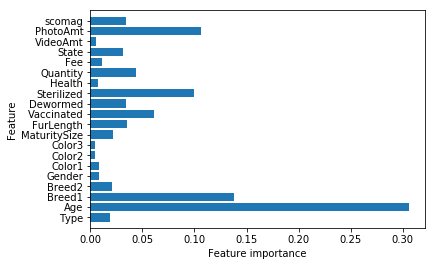

In [16]:
# Adding sentiment score*magnitude did not help increasing R^2 of train and test in RF and GBRT,
# but helpful in Ada which makes sense.  
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(rf) 

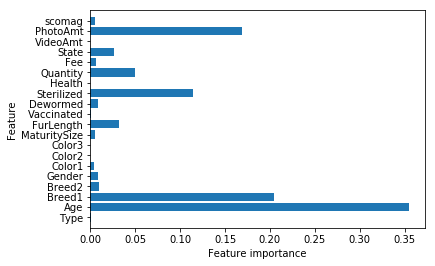

In [17]:
plot_feature_importances(gbrt)

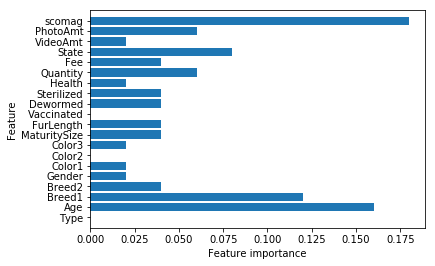

In [18]:
plot_feature_importances(ada)

In [24]:
X_train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,scomag
10864,1,54,213,0,1,1,2,7,2,3,1,1,1,1,1,150,41326,0,8.0,2.22
8669,2,2,265,0,3,7,0,0,2,2,1,1,2,1,6,0,41326,0,7.0,0.33
6105,2,3,299,0,2,1,7,0,1,1,2,2,2,1,1,0,41326,0,14.0,0.78
10506,1,2,307,0,1,2,7,0,2,2,1,1,3,1,1,0,41324,0,1.0,-0.01
2932,1,81,119,307,1,1,7,0,2,2,2,1,2,1,1,0,41401,0,1.0,-0.12


In [25]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['Age', 'Quantity','Fee','VideoAmt','PhotoAmt','scomag']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'State']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=5))])

In [28]:
clf.fit(X_train, y_train)
print("Train accuracy: %.3f" % clf.score(X_train, y_train))
print("Test accuracy: %.3f" % clf.score(X_test, y_test))

Train accuracy: 0.378
Test accuracy: 0.338


In [30]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__max_depth': [1, 2, 3, 5, 8],
}

grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False)
grid_search.fit(X_train, y_train)

print(("Best random forest from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

Best random forest from grid search: 0.361


In [ ]:
# 